In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.optimizers import Adam

In [ ]:
iris = load_iris() # 데이터 불러오기 , 딕셔너리 형태의 데이터 번들
print(type(iris))  # <class 'sklearn.utils.Bunch'>
print('Data :', iris.data.shape)  # 4개씩 묶어서 150개의 자료
print('Label :', iris.target.shape)
print('feature name :', iris.feature_names)
print('target name :', iris.target_names)
print('iris dataset keys\n :', iris.keys())

<class 'sklearn.utils.Bunch'>
Data : (150, 4)
Label : (150,)
feature name : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target name : ['setosa' 'versicolor' 'virginica']
iris dataset keys
 : dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
x = iris.data
y = iris.target

In [ ]:
#이진분류기는 출력이 한 개 카테고리가 세 개 일 뿐, 이진분류기 대상임.

In [ ]:
encoder = OneHotEncoder(sparse=False) #onehotencoder객체를 만들고
y = y.reshape(-1, 1)  # reshape해줘야함, 하나씩 묶을 수 있을 만큼 묶기
encoded_y = encoder.fit_transform(y)
print(encoded_y.shape)
print(encoded_y[:5])

(150, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
def build_DNN():
    model = Sequential()
    model.add(Dense(256, input_dim=4, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    opt = Adam(lr=0.01)
    model.compile(opt, loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    x, encoded_y, test_size=0.2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(120, 4) (120, 3)
(30, 4) (30, 3)


In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=4, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax')) #마지막 출력은 3개여야함, 카테고리가3개라, 다중분류기때는 softmax, 3개의 확률의 합이 1


In [ ]:
opt = Adam(lr=0.00001)  #adam 은 lr을 따로 지정 안해줘도 되지만, 지정하고 싶을땐 지정 가능 but학습하면서 알아서 조절
model.compile(opt, loss='categorical_crossentropy',
              metrics=['accuracy']) #다중분류기일때는 categorical..
model.summary()                      

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 256)               1280      
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 dense_26 (Dense)            (None, 512)               66048     
                                                                 
 dense_27 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 101,763
Trainable params: 101,763
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
fit_hist = model.fit(X_train, Y_train, batch_size=5,
                     epochs=50, verbose=1)

Epoch 1/50
24/24 [==============================] - 1s 4ms/step - loss: 1.1527 - accuracy: 0.3250
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 1.1223 - accuracy: 0.3250
Epoch 3/50
24/24 [==============================] - 0s 4ms/step - loss: 1.0943 - accuracy: 0.3250
Epoch 4/50
24/24 [==============================] - 0s 6ms/step - loss: 1.0681 - accuracy: 0.3583
Epoch 5/50
24/24 [==============================] - 0s 5ms/step - loss: 1.0450 - accuracy: 0.7250
Epoch 6/50
24/24 [==============================] - 0s 4ms/step - loss: 1.0237 - accuracy: 0.8917
Epoch 7/50
24/24 [==============================] - 0s 5ms/step - loss: 1.0037 - accuracy: 0.9000
Epoch 8/50
24/24 [==============================] - 0s 3ms/step - loss: 0.9844 - accuracy: 0.8583
Epoch 9/50
24/24 [==============================] - 0s 3ms/step - loss: 0.9666 - accuracy: 0.7417
Epoch 10/50
24/24 [==============================] - 0s 2ms/step - loss: 0.9490 - accuracy: 0.7750
Epoch 11/50
24/24 [

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Final test set accuracy :', score[1])

Final test set accuracy : 1.0


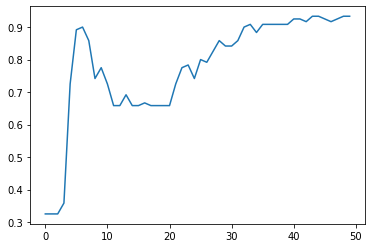

In [ ]:
plt.plot(fit_hist.history['accuracy'])
plt.show()

In [ ]:
my_sample = np.random.randint(30) #0~29까지 랜덤한 int
sample = X_test[my_sample] #랜덤하게 샘플 인덱싱
print(sample)  #이렇게면 한 값씩 빼가서 4차원인데 값이 한개라 에러 다시 묶어줘야함

[5.4 3.7 1.5 0.2]


In [ ]:
sample = sample.reshape(-1, 4) #4개씩 묶기
print(sample)

[[5.4 3.7 1.5 0.2]]


In [ ]:
pred = model.predict(sample) #모델에게 예측시키기
print('pred is :', pred)
print('actual is :', Y_test[my_sample])
print('Target :', iris.target_names[np.argmax(Y_test[my_sample])]) #가장 큰 값의 인덱스를 리턴해줌
print('Predeiction after learning is :',iris.target_names[np.argmax(pred)] )

pred is : [[0.89543205 0.07305882 0.03150917]]
actual is : [1. 0. 0.]
Target : setosa
Predeiction after learning is : setosa
